## Melchizedek Ackah-Blay

December 10, 2024

**Income Insights**

*libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns

import warnings as w
w.filterwarnings('ignore')

*dataset*

In [2]:
df = pd.read_csv(r'/Users/melki/Desktop/income_evaluation.csv')

*sample data*

In [3]:
df.sample(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11853,52,Private,321959,Some-college,10,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States,>50K
15624,29,Private,24562,Bachelors,13,Divorced,Other-service,Unmarried,Other,Female,0,0,40,United-States,<=50K
4373,35,Private,111128,10th,6,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
4625,47,Private,345493,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,99999,0,55,Taiwan,>50K


*shape*

In [4]:
df.shape

(32561, 15)

*data information*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


*summary statistics*

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


*null values*

In [7]:
df.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

*duplicates*

In [8]:
df.duplicated().sum()

24

*dropping duplicates*

In [9]:
df.drop_duplicates(inplace = True)

*new shape*

In [10]:
df.shape

(32537, 15)

*renaming columns*

In [14]:
df.rename(columns = {
    ' workclass':'workclass',
    ' fnlwgt':'fnlwgt',
    ' education':'education',
    ' education-num':'education_num',
    ' marital-status':'marital_status',
    ' occupation':'occupation',
    ' relationship':'relationship',
    ' race':'race',
    ' sex':'sex',
    ' capital-gain':'capital_gain',
    ' capital-loss':'capital_loss',
    ' hours-per-week':'hours_per_week',
    ' native-country':'native_country',
    ' income':'income'
}, inplace = True
         )

*verifying*

In [16]:
df.head(4)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


*education levels*

In [18]:
edu_levels = df['education'].value_counts()
edu_levels

education
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: count, dtype: int64

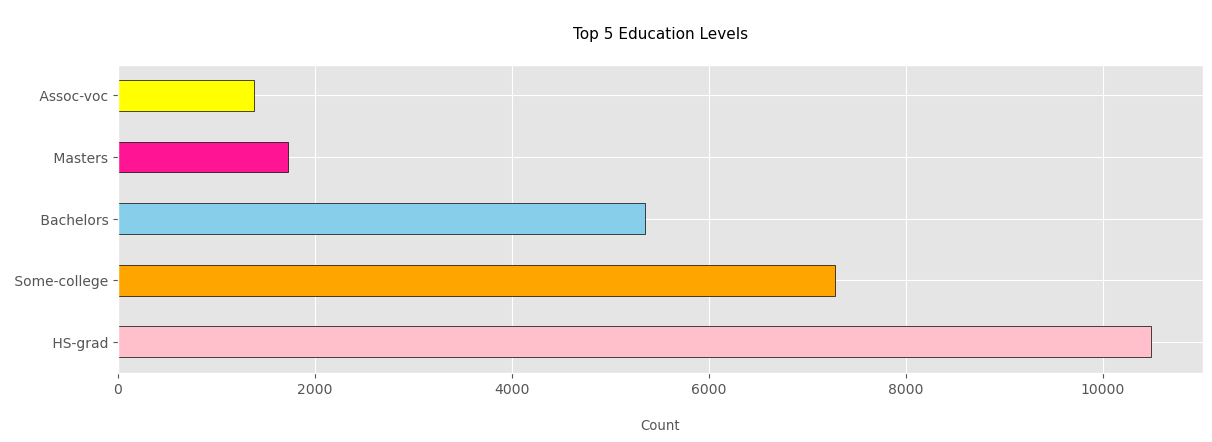

In [266]:
plt.figure(figsize = (14, 4))
edu_levels.head(5).plot(kind = 'barh', color = ['pink', 'orange', 'skyblue', 'deeppink', 'yellow'], edgecolor = 'black')
plt.title('\nTop 5 Education Levels\n', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

*income distribution*

In [30]:
inc_levels = df['income'].value_counts()
pd.DataFrame(inc_levels)

,count
income,
<=50K,24698
>50K,7839


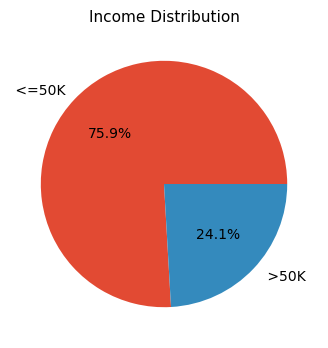

In [32]:
plt.figure(figsize = (4,4))
inc_levels.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Income Distribution', fontsize = 11)
plt.xlabel('')
plt.ylabel('')
plt.show()

*occupation distribution*

In [35]:
occ_dist = df['occupation'].value_counts(ascending = False)
occ_dist

occupation
 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: count, dtype: int64

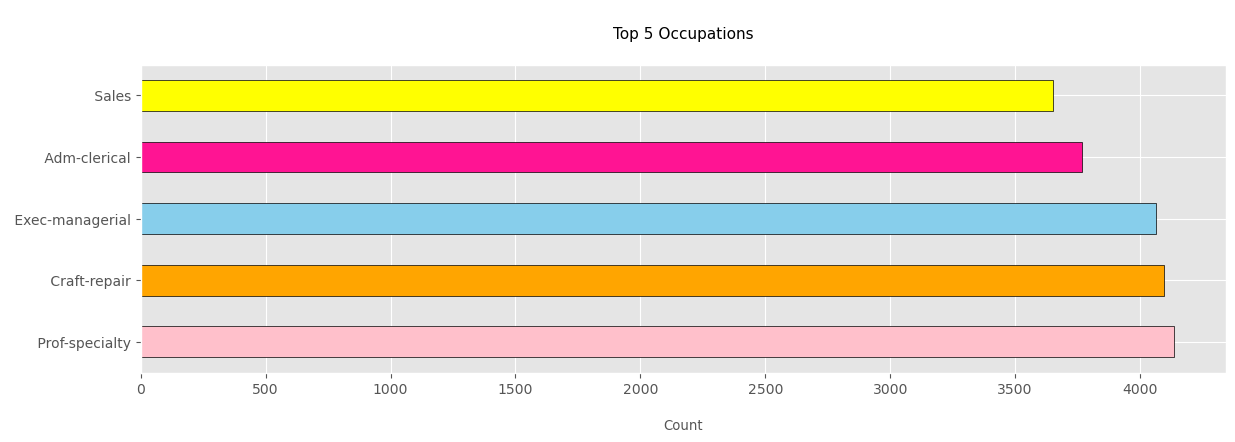

In [265]:
plt.figure(figsize = (14, 4))
occ_dist.head(5).plot(kind = 'barh', color = ['pink', 'orange', 'skyblue', 'deeppink', 'yellow'], edgecolor = 'black')
plt.title('\nTop 5 Occupations\n', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

*marital status distribution*

In [38]:
mar_dist = df['marital_status'].value_counts(ascending = False)
mar_dist

marital_status
 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

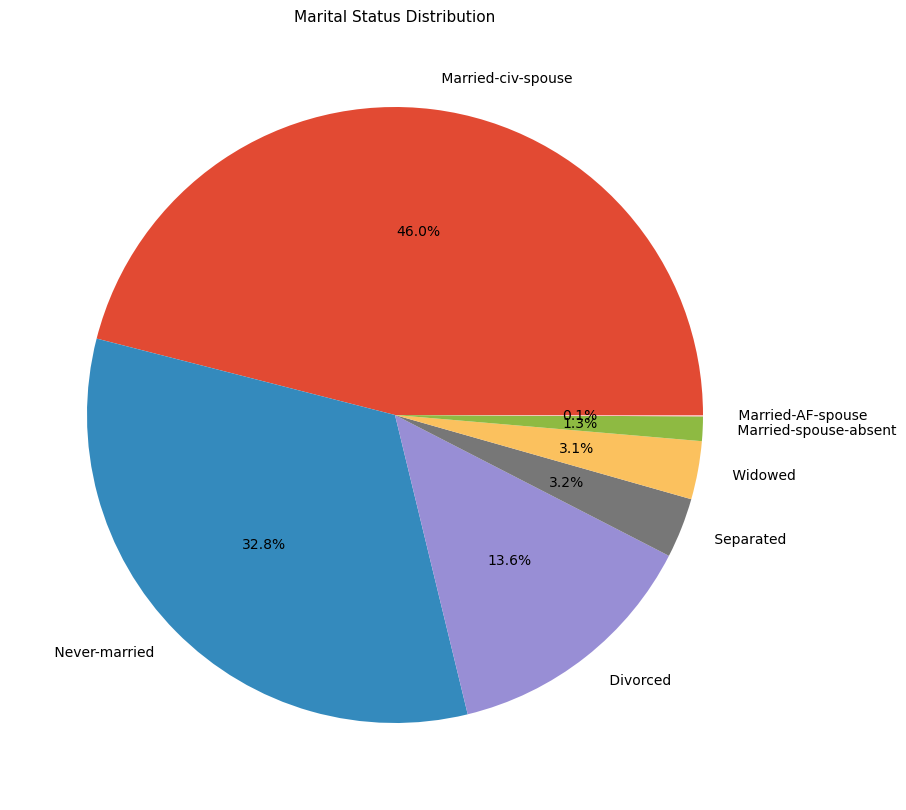

In [48]:
plt.figure(figsize = (10, 10))
mar_dist.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Marital Status Distribution', fontsize = 11)
plt.xlabel('')
plt.ylabel('')
plt.show()

*workclass distribution*

In [50]:
work_dist = df['workclass'].value_counts(ascending = False)
work_dist

workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

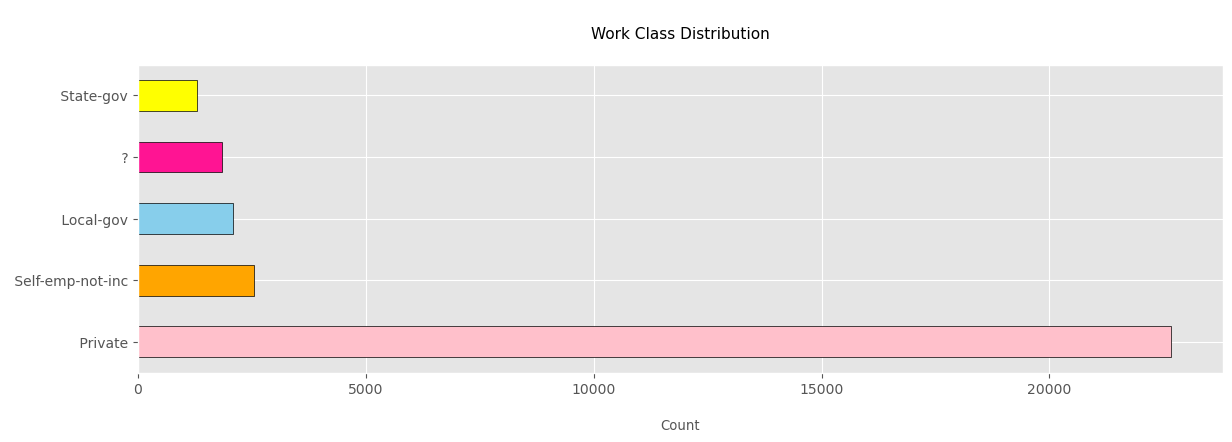

In [264]:
plt.figure(figsize = (14, 4))
work_dist.head(5).plot(kind = 'barh', color = ['pink', 'orange', 'skyblue', 'deeppink', 'yellow'], edgecolor = 'black')
plt.title('\nWork Class Distribution\n', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

*race distribution*

In [53]:
# how many races are there
df['race'].nunique()

5

In [54]:
race_dist = df['race'].value_counts(ascending = False)
race_dist

race
 White                 27795
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

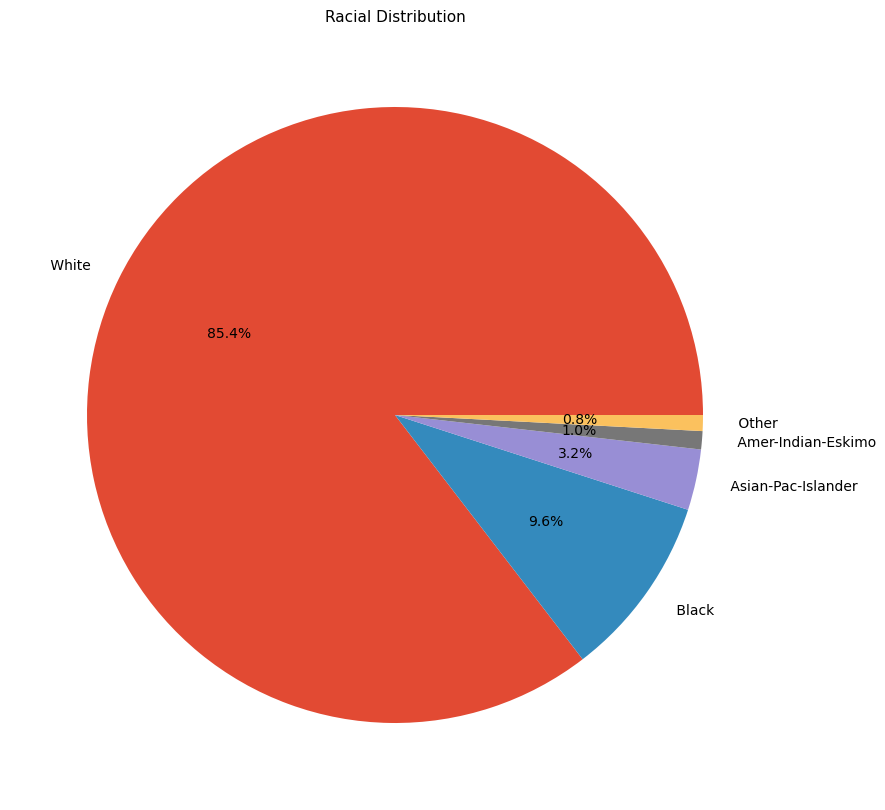

In [58]:
plt.figure(figsize = (10, 10))
race_dist.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Racial Distribution', fontsize = 11)
plt.xlabel('')
plt.ylabel('')
plt.show()

*gender distribution*

In [59]:
gender_dist = df['sex'].value_counts(ascending = False)
gender_dist

sex
 Male      21775
 Female    10762
Name: count, dtype: int64

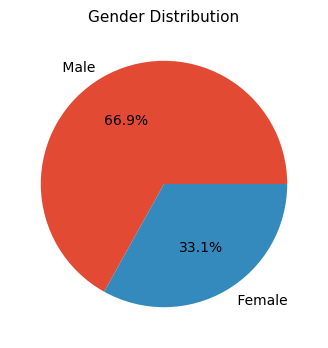

In [60]:
plt.figure(figsize = (4, 4))
gender_dist.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Gender Distribution', fontsize = 11)
plt.xlabel('')
plt.ylabel('')
plt.show()

*Country Distribution*

In [61]:
immi_dist = df['native_country'].value_counts(ascending = False)
immi_dist

native_country
 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

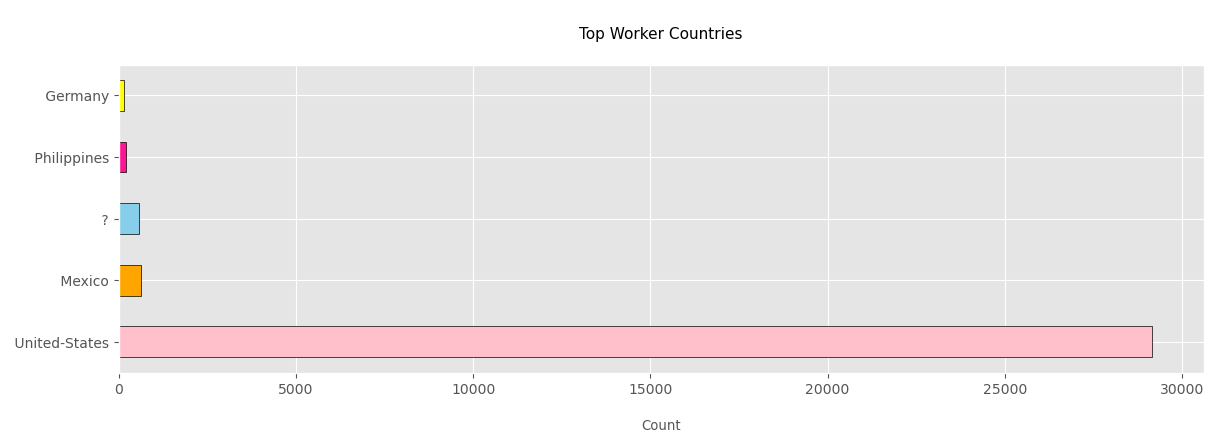

In [263]:
plt.figure(figsize = (14, 4))
immi_dist.head(5).plot(kind = 'barh', color = ['pink', 'orange', 'skyblue', 'deeppink', 'yellow'], edgecolor = 'black')
plt.title('\nTop Worker Countries\n', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

*work hours by education*

In [66]:
work_by_edu = df.groupby('education')['hours_per_week'].mean().sort_values(ascending = False)
pd.DataFrame(work_by_edu)

,hours_per_week
education,
Prof-school,47.425347
Doctorate,46.973366
Masters,43.832753
Bachelors,42.614048
Assoc-voc,41.610709
HS-grad,40.574995
Assoc-acdm,40.504217
7th-8th,39.365891
Some-college,38.868855


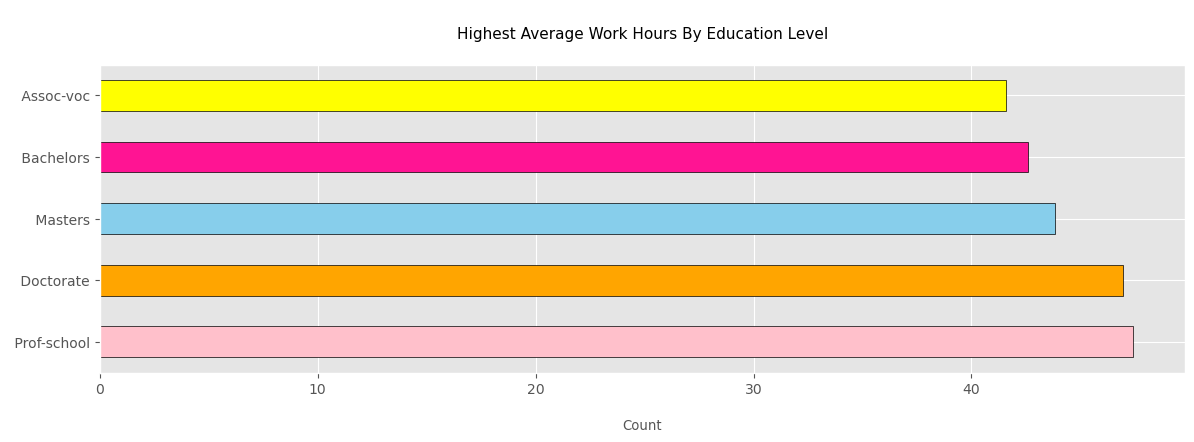

In [262]:
plt.figure(figsize = (14, 4))
work_by_edu.head(5).plot(kind = 'barh', color = ['pink', 'orange', 'skyblue', 'deeppink', 'yellow'], edgecolor = 'black')
plt.title('\nHighest Average Work Hours By Education Level\n', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

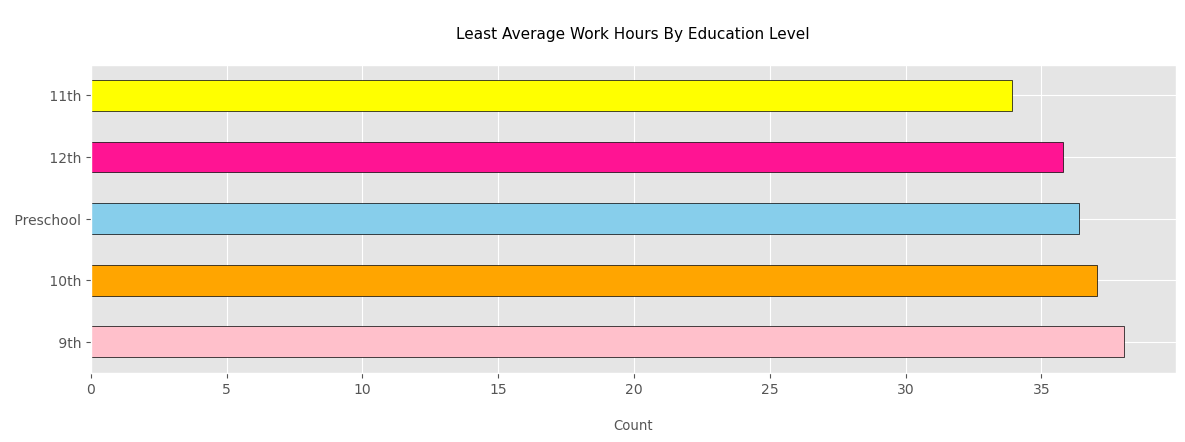

In [261]:
plt.figure(figsize = (14, 4))
work_by_edu.tail(5).plot(kind = 'barh', color = ['pink', 'orange', 'skyblue', 'deeppink', 'yellow'], edgecolor = 'black')
plt.title('\nLeast Average Work Hours By Education Level\n', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

*capital gains by occupation*

In [79]:
cap_occ = df.groupby('occupation')['capital_gain'].mean().sort_values(ascending = False)
cap_occ

occupation
 Prof-specialty       2729.336557
 Exec-managerial      2263.329643
 Sales                1319.829315
 Protective-serv       708.098613
 Tech-support          674.279396
 Craft-repair          650.306058
 ?                     604.491047
 Farming-fishing       590.915323
 Adm-clerical          496.218153
 Transport-moving      490.323732
 Machine-op-inspct     329.018000
 Priv-house-serv       283.659864
 Handlers-cleaners     257.761140
 Other-service         191.534184
 Armed-Forces            0.000000
Name: capital_gain, dtype: float64

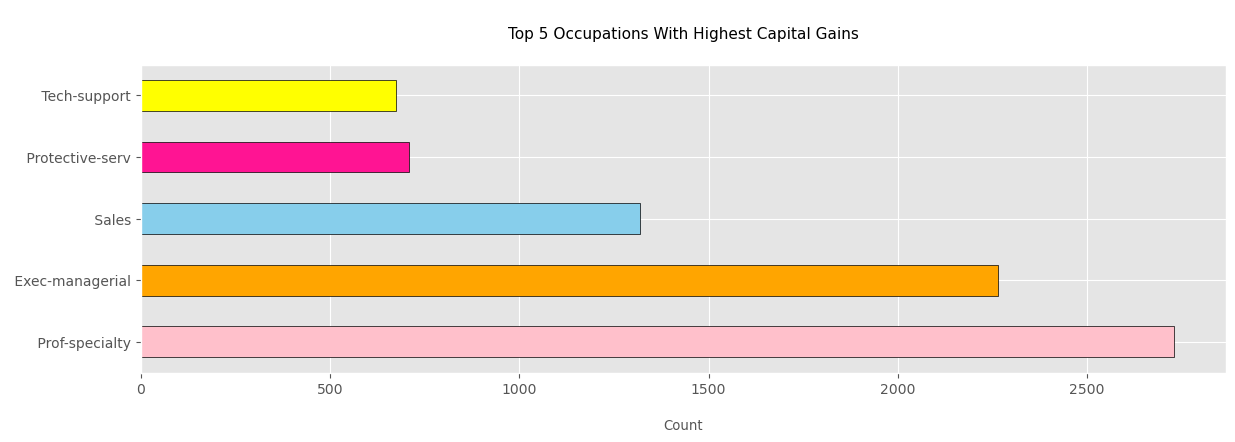

In [260]:
plt.figure(figsize = (14, 4))
cap_occ.head(5).plot(kind = 'barh', color = ['pink', 'orange', 'skyblue', 'deeppink', 'yellow'], edgecolor = 'black')
plt.title('\nTop 5 Occupations With Highest Capital Gains\n', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

*capital loss by occupation*

In [82]:
cap_loss = df.groupby('occupation')['capital_loss'].mean().sort_values(ascending = False)
cap_loss

occupation
 Armed-Forces         209.666667
 Exec-managerial      138.872571
 Prof-specialty       136.271035
 Tech-support          98.772384
 Sales                 98.300548
 Craft-repair          88.573278
 Transport-moving      81.480902
 Protective-serv       78.334361
 Farming-fishing       63.202621
 Machine-op-inspct     61.768000
 Adm-clerical          60.826699
 ?                     60.529571
 Handlers-cleaners     45.669102
 Other-service         38.297174
 Priv-house-serv       21.741497
Name: capital_loss, dtype: float64

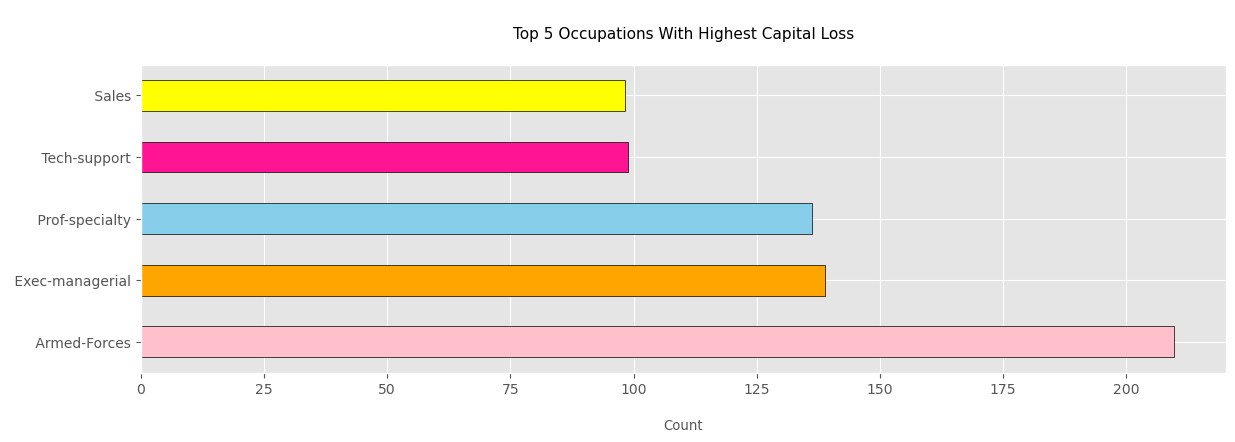

In [259]:
plt.figure(figsize = (14, 4))
cap_loss.head(5).plot(kind = 'barh', color = ['pink', 'orange', 'skyblue', 'deeppink', 'yellow'], edgecolor = 'black')
plt.title('\nTop 5 Occupations With Highest Capital Loss\n', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

*capital gains by gender*

In [87]:
cap_gend = df.groupby('sex')['capital_gain'].mean().sort_values(ascending = False)
pd.DataFrame(cap_gend)

,capital_gain
sex,
Male,1330.285832
Female,568.885895


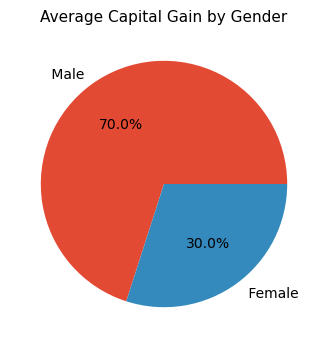

In [88]:
plt.figure(figsize = (4, 4))
cap_gend.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Average Capital Gain by Gender', fontsize = 11)
plt.xlabel('')
plt.ylabel('')
plt.show()

*capital loss by gender*

In [89]:
loss_gend = df.groupby('sex')['capital_loss'].mean().sort_values(ascending = False)
pd.DataFrame(cap_gend)

,capital_gain
sex,
Male,1330.285832
Female,568.885895


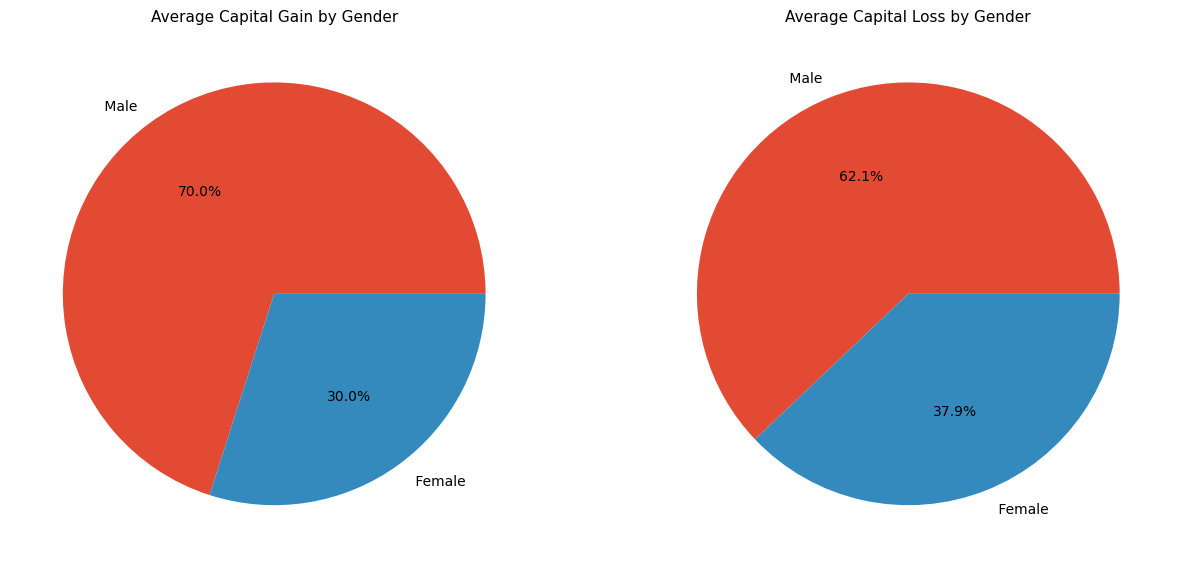

In [150]:
plt.figure(figsize = (15, 15))


plt.subplot(1,2,1)
cap_gend.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Average Capital Gain by Gender', fontsize = 11)
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,2,2)
loss_gend.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Average Capital Loss by Gender', fontsize = 11)
plt.xlabel('')
plt.ylabel('')

plt.subplots_adjust(wspace = 0.2)
plt.show()

*income by marital status*

In [95]:
df_50 = df[df['income'] == ' >50K']
mar_inc = df_50.groupby('marital_status')['income'].count().sort_values(ascending = False)
mar_inc

marital_status
 Married-civ-spouse       6690
 Never-married             491
 Divorced                  463
 Widowed                    85
 Separated                  66
 Married-spouse-absent      34
 Married-AF-spouse          10
Name: income, dtype: int64

In [142]:
df_502 = df[df['income'] == ' <=50K']
mar_inc2 = df_502.groupby('marital_status')['income'].count().sort_values(ascending = False)
mar_inc2

marital_status
 Never-married            10176
 Married-civ-spouse        8280
 Divorced                  3978
 Separated                  959
 Widowed                    908
 Married-spouse-absent      384
 Married-AF-spouse           13
Name: income, dtype: int64

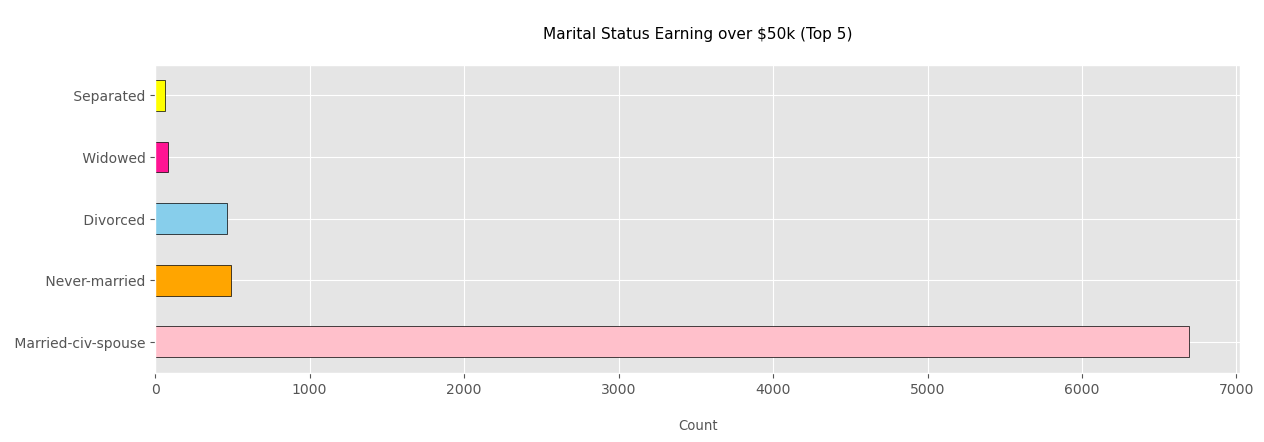

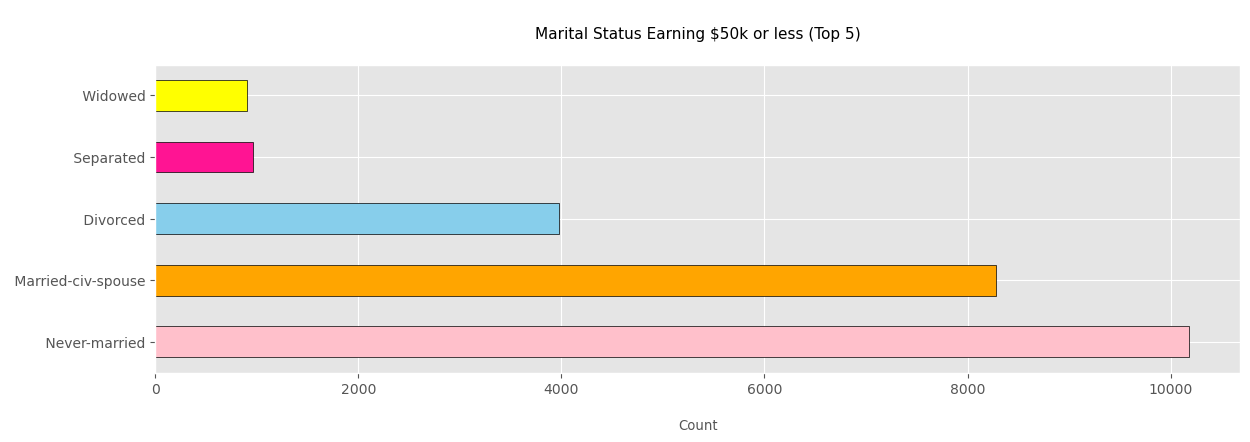

In [258]:
plt.figure(figsize = (14, 4))
mar_inc.head(5).plot(kind = 'barh', color = ['pink', 'orange', 'skyblue', 'deeppink', 'yellow'], edgecolor = 'black')
plt.title('\nMarital Status Earning over $50k (Top 5)\n', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

plt.figure(figsize = (14, 4))
mar_inc2.head(5).plot(kind = 'barh', color = ['pink', 'orange', 'skyblue', 'deeppink', 'yellow'], edgecolor = 'black')
plt.title('\nMarital Status Earning $50k or less (Top 5)\n', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

*under 30 education distribution*

In [104]:
df3 = df[(df['age'] < 30) & (df['age'] <= 18)]
edu_30 = df3['education'].value_counts()
edu_30

education
 11th            346
 10th            176
 HS-grad         160
 Some-college    119
 12th             97
 9th              33
 7th-8th           8
 5th-6th           5
 Masters           1
Name: count, dtype: int64

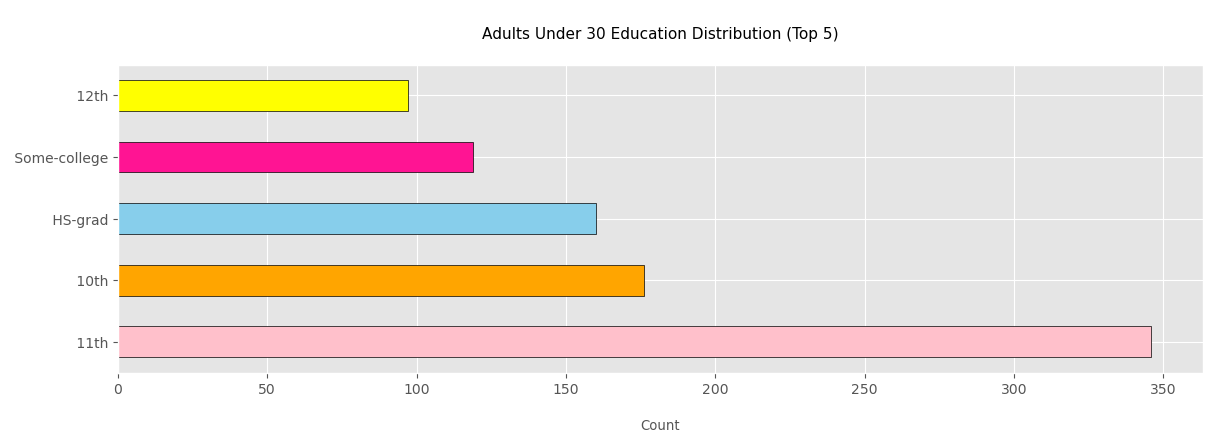

In [256]:
plt.figure(figsize = (14, 4))
edu_30.head(5).plot(kind = 'barh', color = ['pink', 'orange', 'skyblue', 'deeppink', 'yellow'], edgecolor = 'black')
plt.title('\nAdults Under 30 Education Distribution (Top 5)\n', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

*middle-aged income by gender*

In [106]:
df_mid = df[(df['age'] > 30 ) & (df['age'] < 60)]
middle_dist = df_mid.groupby('sex')['income'].count().sort_values(ascending = False)
pd.DataFrame(middle_dist)

,income
sex,
Male,13648
Female,5688


*retiree income distribution by gender*

In [108]:
df_ret = df[df['age'] > 65]
ret_dist = df_ret.groupby('sex')['income'].count().sort_values(ascending = False)
pd.DataFrame(ret_dist)

,income
sex,
Male,773
Female,384


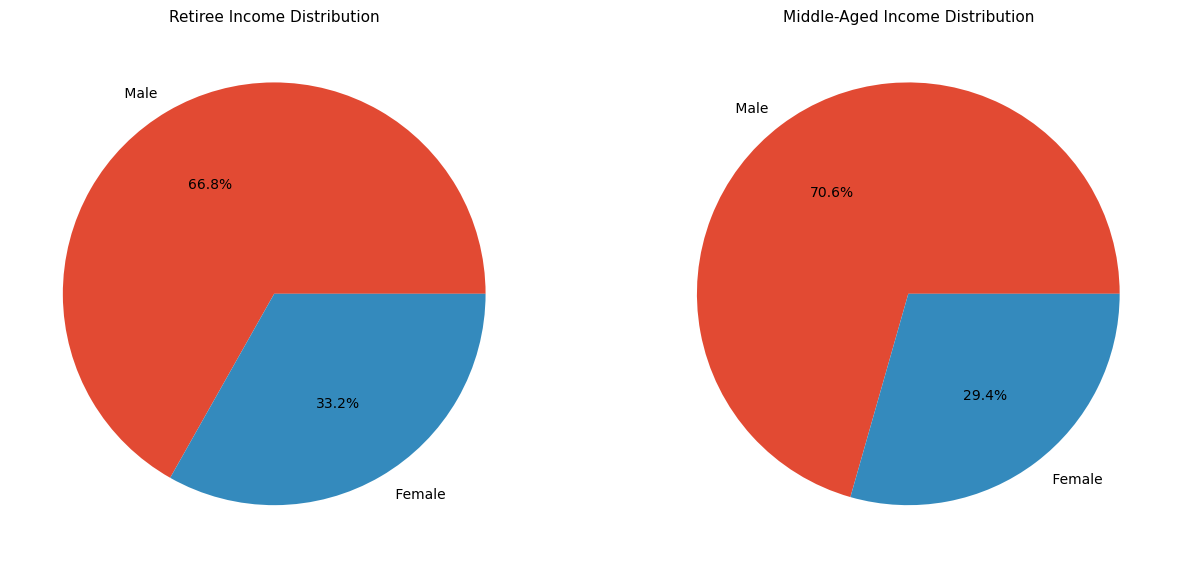

In [139]:
plt.figure(figsize = (15, 15))

plt.subplot(1,2,1)
ret_dist.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Retiree Income Distribution', fontsize = 11)
plt.xlabel('')
plt.ylabel('')

plt.subplot(1,2,2)
middle_dist.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Middle-Aged Income Distribution', fontsize = 11)
plt.xlabel('')
plt.ylabel('')
plt.subplots_adjust(wspace = 0.2)
plt.show()

*income by relationship*

In [113]:
income_rela = df.groupby('relationship')['income'].count().sort_values(ascending = False)
income_rela

relationship
 Husband           13187
 Not-in-family      8292
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: income, dtype: int64

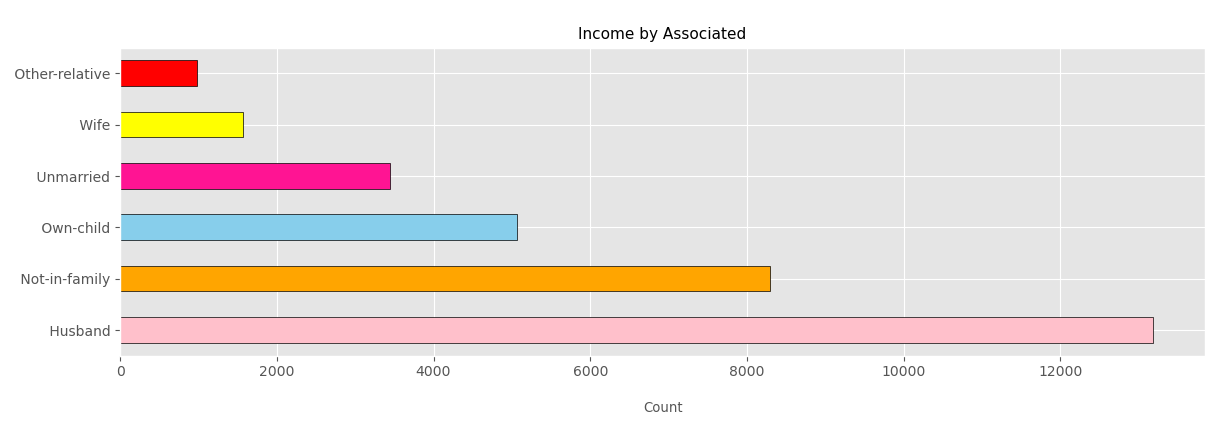

In [255]:
plt.figure(figsize = (14, 4))
income_rela.plot(kind = 'barh', color = ['pink', 'orange', 'skyblue', 'deeppink', 'yellow', 'red'], edgecolor = 'black')
plt.title('\nIncome by Associated', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

*gender based education distribution*

In [153]:
df4 = df[df['sex'] == ' Female']
f_edu = df4['education'].value_counts(ascending = False)

In [152]:
df5 = df[df['sex'] == ' Male']
m_edu = df5['education'].value_counts(ascending = False)

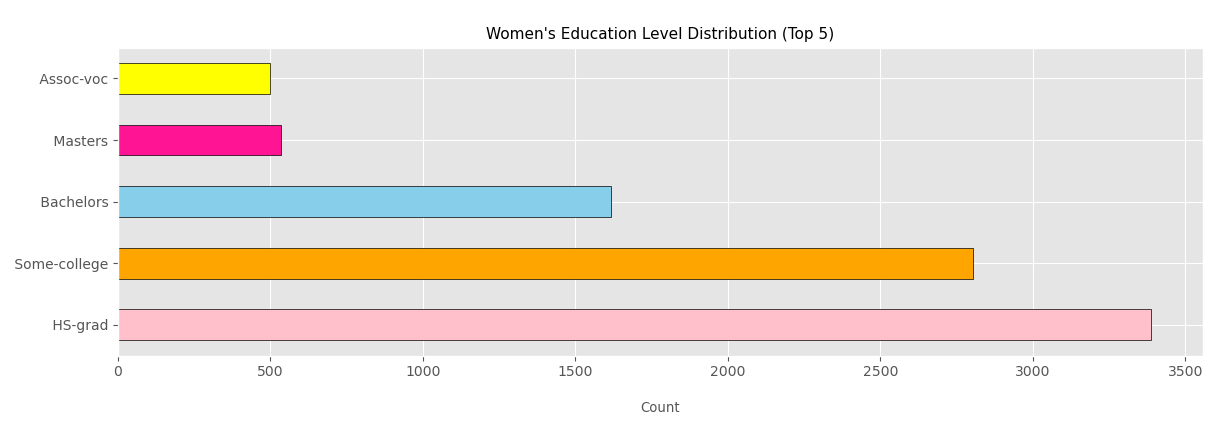

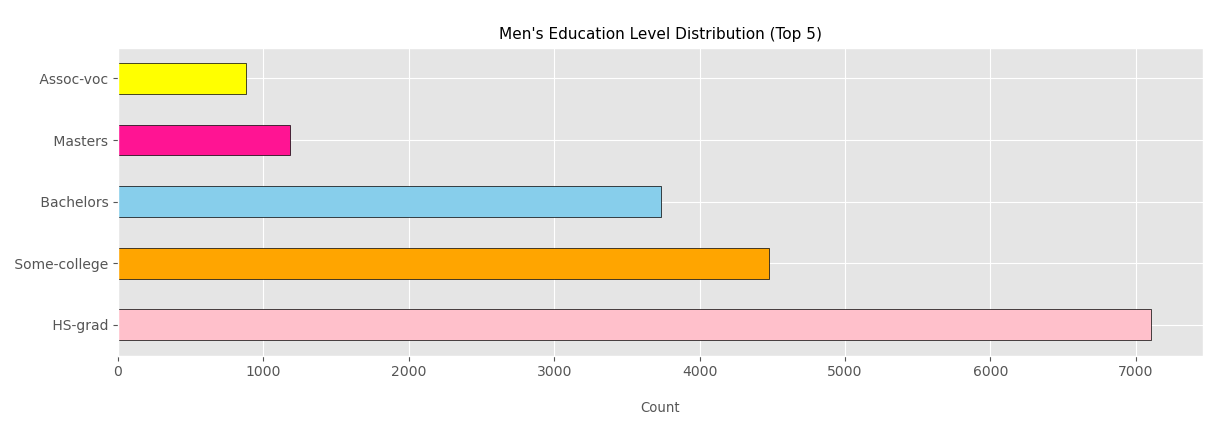

In [254]:
plt.figure(figsize = (14, 4))
f_edu.head(5).plot(kind = 'barh', color = ['pink', 'orange', 'skyblue', 'deeppink', 'yellow', 'red'], edgecolor = 'black')
plt.title('\nWomen\'s Education Level Distribution (Top 5)', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

plt.figure(figsize = (14, 4))
m_edu.head(5).plot(kind = 'barh', color = ['pink', 'orange', 'skyblue', 'deeppink', 'yellow', 'red'], edgecolor = 'black')
plt.title('\nMen\'s Education Level Distribution (Top 5)', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

*work hours by race*

In [154]:
race_wrk = df.groupby('race')['hours_per_week'].mean().sort_values(ascending = False)
pd.DataFrame(race_wrk)

,hours_per_week
race,
White,40.692067
Asian-Pac-Islander,40.131985
Amer-Indian-Eskimo,40.048232
Other,39.468635
Black,38.425048


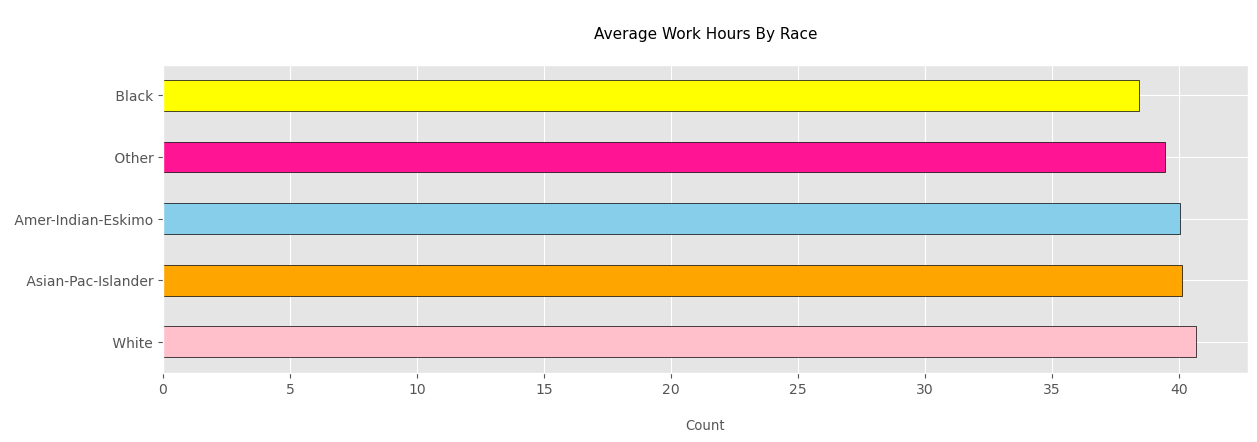

In [252]:
plt.figure(figsize = (14, 4))
race_wrk.head(5).plot(kind = 'barh', color = ['pink', 'orange', 'skyblue', 'deeppink', 'yellow', 'red'], edgecolor = 'black')
plt.title('\nAverage Work Hours By Race\n', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

*education levels by race*

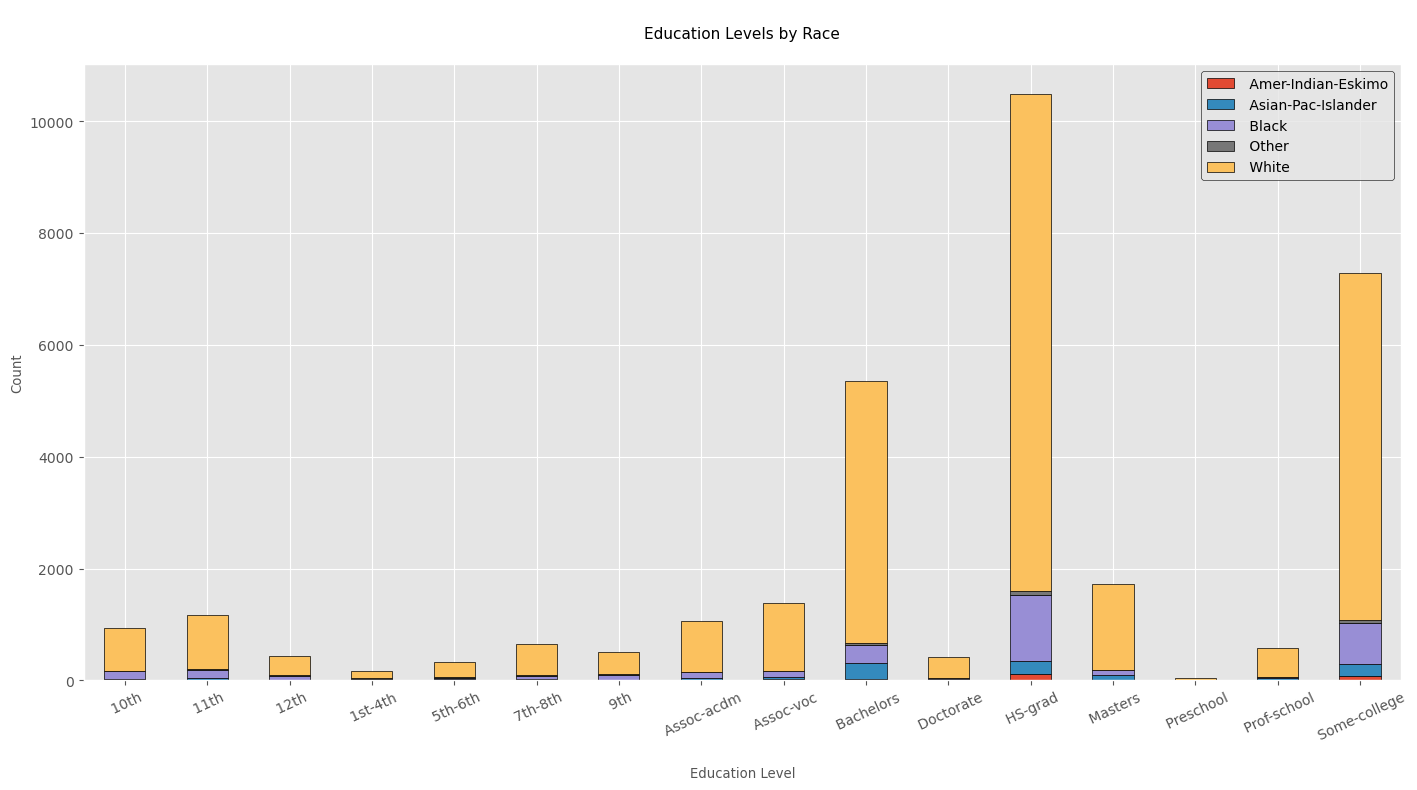

In [215]:
edu_stacked = df.groupby(['education', 'race'])['race'].count().unstack()
edu_stacked.plot(kind = 'bar', stacked = True, edgecolor = 'black', figsize = (17, 8))
plt.title('\nEducation Levels by Race\n', fontsize = 11)
plt.xlabel('\nEducation Level', fontsize = 9.5)
plt.xticks(rotation = 25)
plt.ylabel('Count', fontsize = 9.5)
plt.legend(edgecolor = 'black')
plt.show()

*marital status by race*

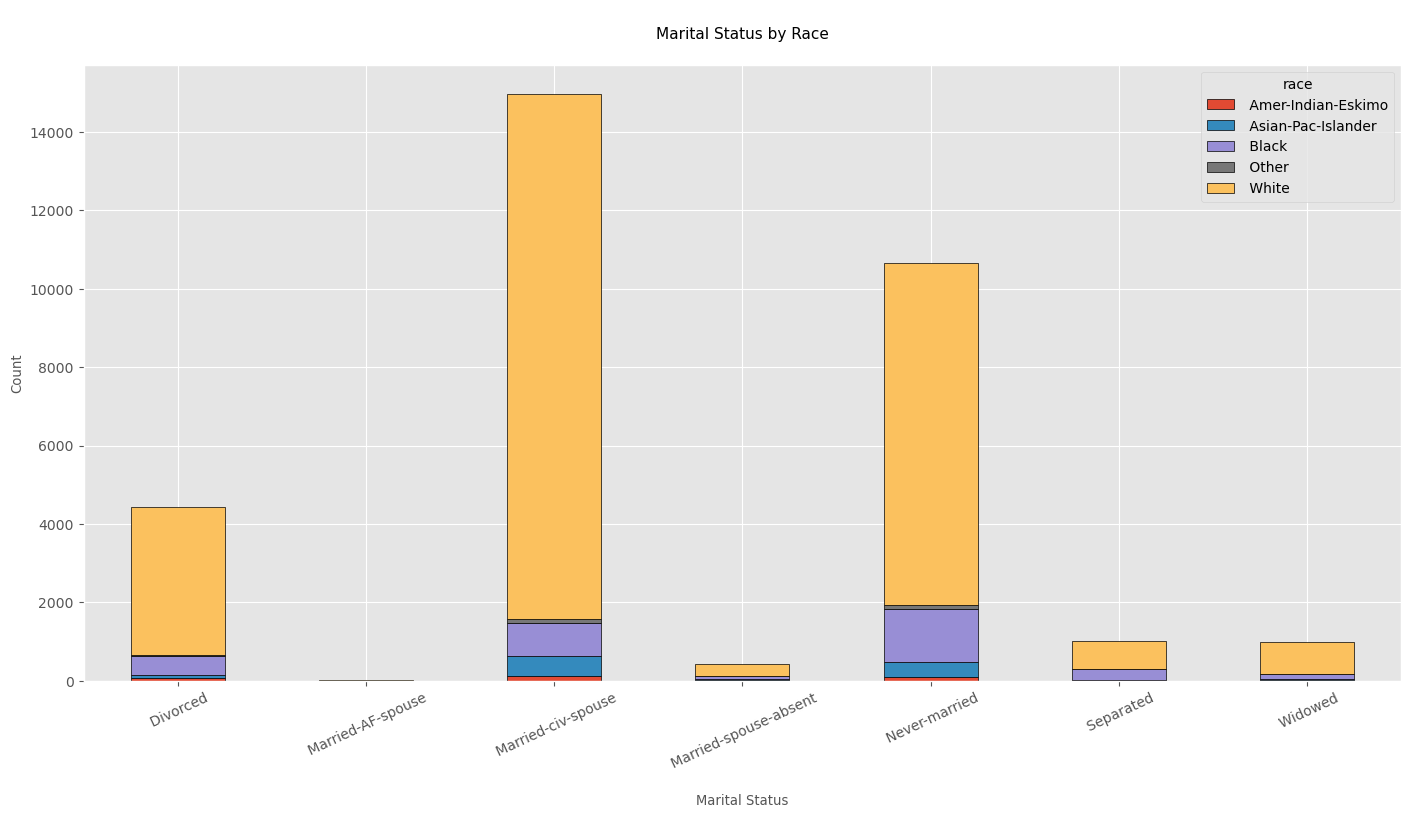

In [206]:
mar_race = df.groupby(['marital_status', 'race'])['race'].count().unstack()
mar_race.plot(kind = 'bar', stacked = True, edgecolor = 'black', figsize = (17, 8))
plt.title('\nMarital Status by Race\n', fontsize = 11)
plt.xlabel('\nMarital Status', fontsize = 9.5)
plt.xticks(rotation = 25)
plt.ylabel('Count', fontsize = 9.5)
plt.show()

*gender by race*

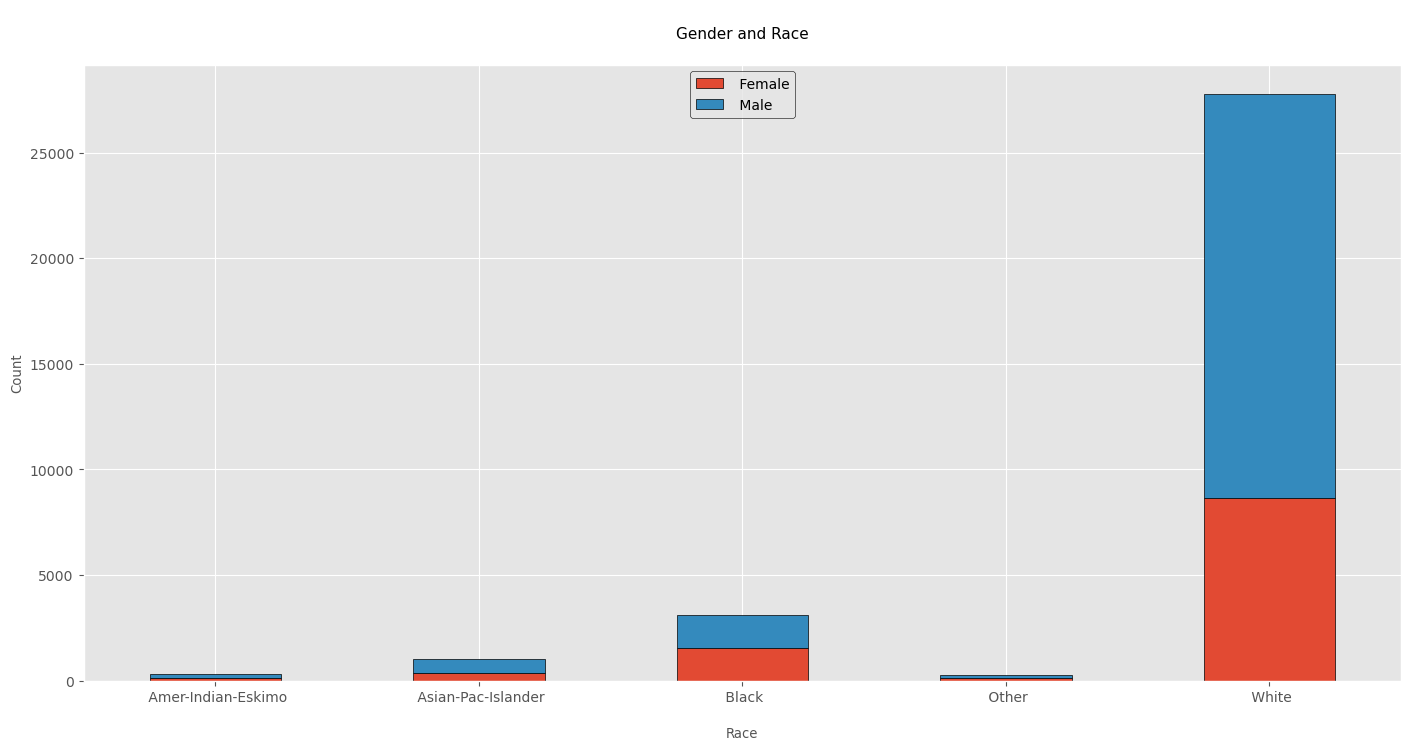

In [214]:
mar_race = df.groupby(['race', 'sex'])['sex'].count().unstack()
mar_race.plot(kind = 'bar', stacked = True, edgecolor = 'black', figsize = (17, 8))
plt.title('\nGender and Race\n', fontsize = 11)
plt.xlabel('\nRace', fontsize = 9.5)
plt.xticks(rotation = 0)
plt.ylabel('Count', fontsize = 9.5)
plt.legend(loc = 'upper center', edgecolor = 'black')
plt.show()

*age distribution*

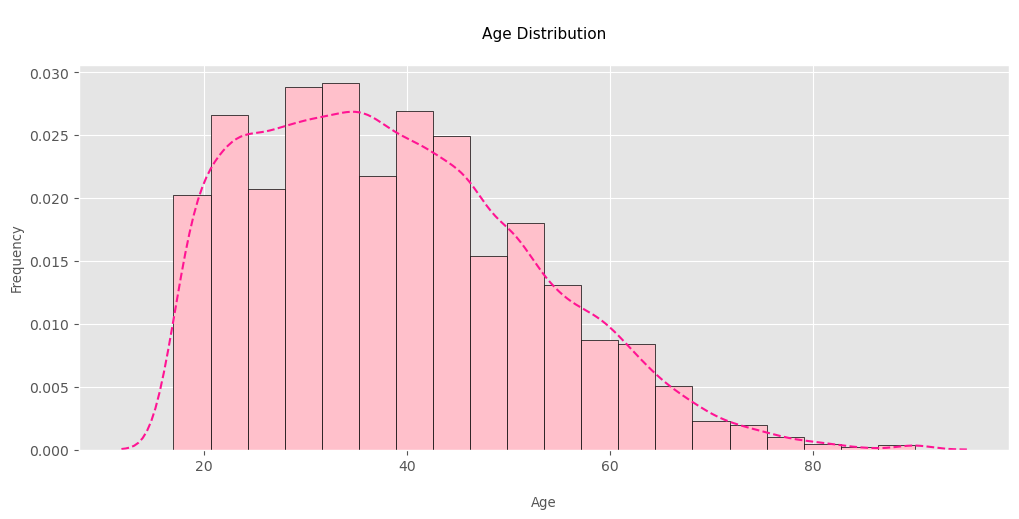

In [181]:
plt.figure(figsize = (12, 5))
plt.hist(df['age'], density = True, edgecolor = 'black', color = 'pink', bins = 20)
sns.kdeplot(df['age'], color = 'deeppink', linestyle = '--', linewidth = 1.5)
plt.title('\nAge Distribution\n', fontsize = 11)
plt.xlabel('\nAge', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.show()

*work hours distribution*

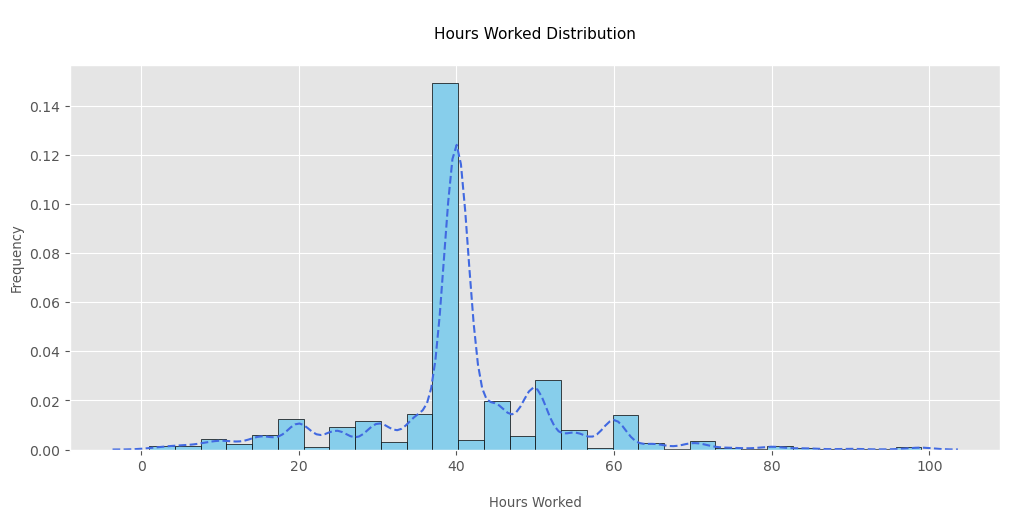

In [200]:
plt.figure(figsize = (12, 5))
plt.hist(df['hours_per_week'], density = True, edgecolor = 'black', color = 'skyblue', bins = 30)
sns.kdeplot(df['hours_per_week'], color = 'royalblue', linestyle = '--', linewidth = 1.5)
plt.title('\nHours Worked Distribution\n', fontsize = 11)
plt.xlabel('\nHours Worked', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.show()

*capital gains and loss distribution*

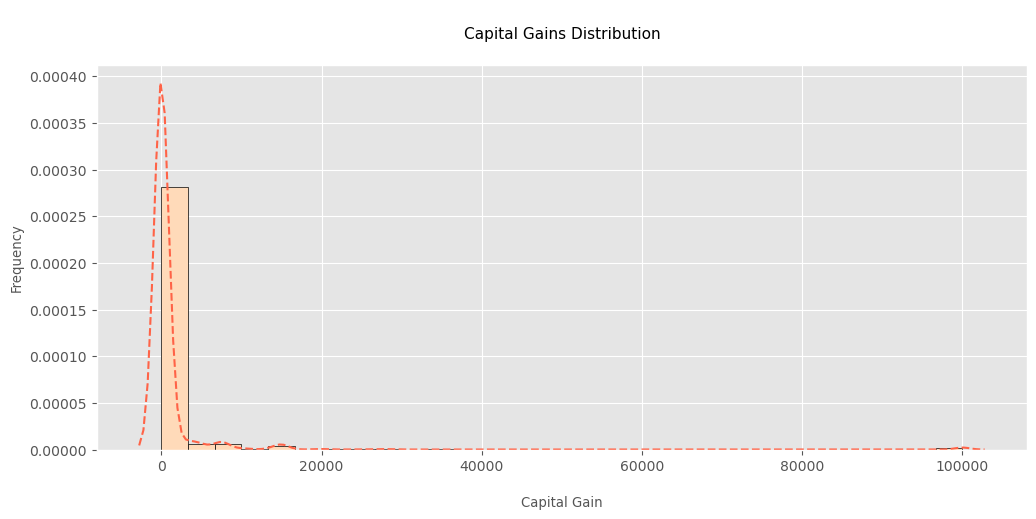

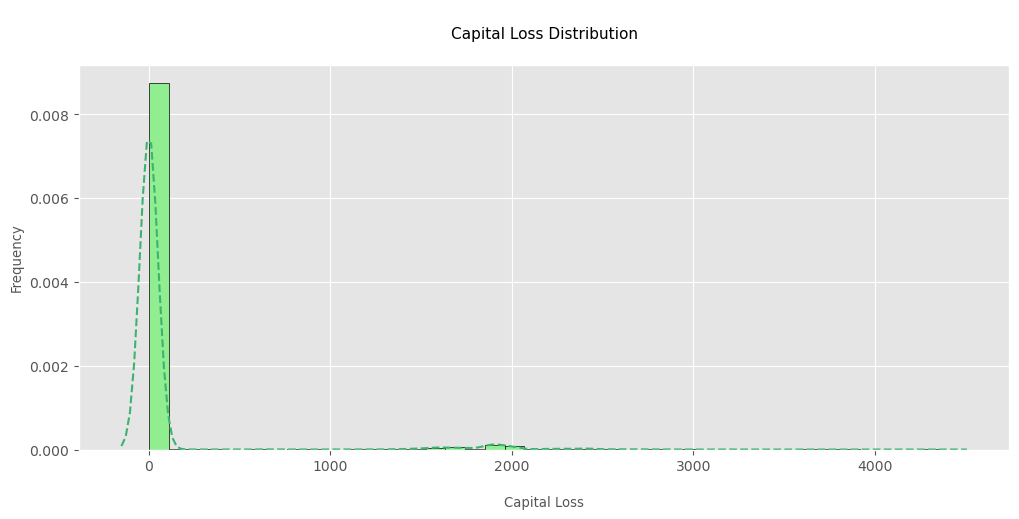

In [203]:
plt.figure(figsize = (12, 5))
plt.hist(df['capital_gain'], density = True, edgecolor = 'black', color = 'peachpuff', bins = 30)
sns.kdeplot(df['capital_gain'], color = 'tomato', linestyle = '--', linewidth = 1.5)
plt.title('\nCapital Gains Distribution\n', fontsize = 11)
plt.xlabel('\nCapital Gain', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.show()

plt.figure(figsize = (12, 5))
plt.hist(df['capital_loss'], density = True, edgecolor = 'black', color = 'lightgreen', bins = 40)
sns.kdeplot(df['capital_loss'], color = 'mediumseagreen', linestyle = '--', linewidth = 1.5)
plt.title('\nCapital Loss Distribution\n', fontsize = 11)
plt.xlabel('\nCapital Loss', fontsize = 9.5)
plt.ylabel('Frequency', fontsize = 9.5)
plt.show()

*recent college grads earning over $50k*

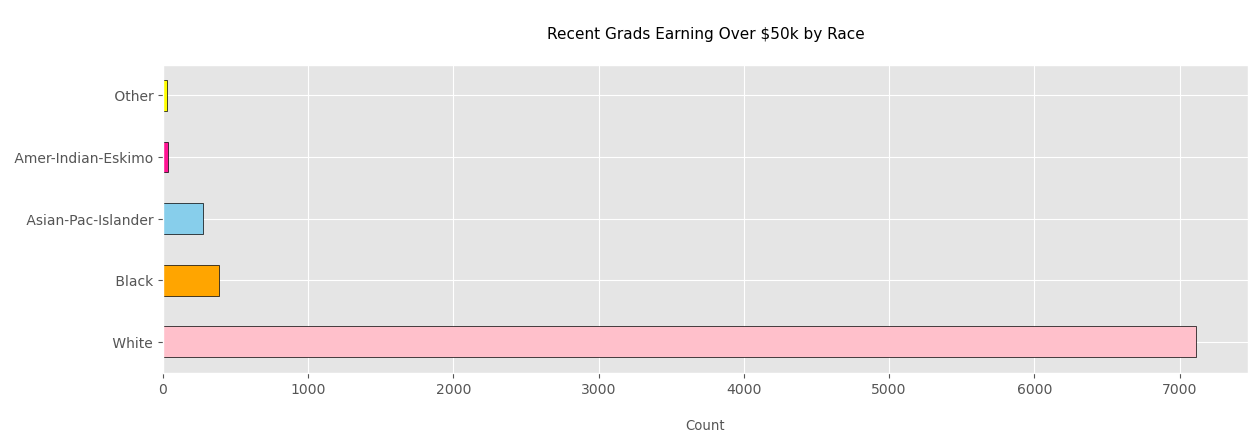

In [251]:
df6 = df[df['income'] == ' >50K']
rec_grad = df6['race'].value_counts(ascending = False)

plt.figure(figsize = (14, 4))
rec_grad.head(5).plot(kind = 'barh', color = ['pink', 'orange', 'skyblue', 'deeppink', 'yellow', 'red'], edgecolor = 'black')
plt.title('\nRecent Grads Earning Over $50k by Race\n', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

*higher/lower than average capital gain by gender*

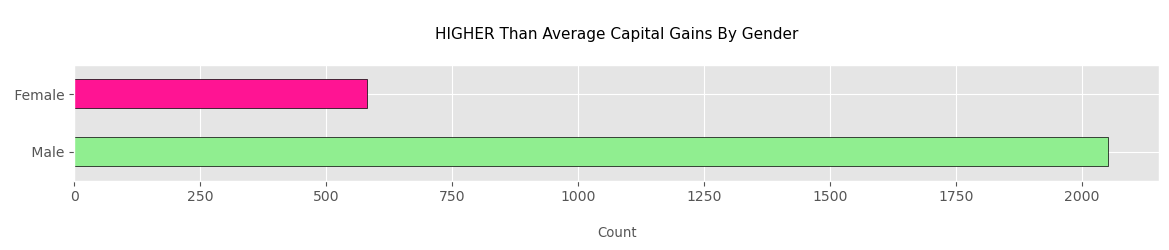

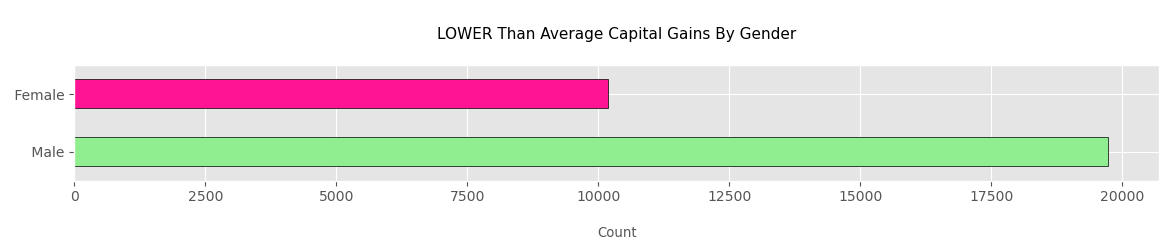

In [250]:
df7 = df[df['capital_gain'] > df['capital_gain'].mean()]
cap_max = df7['sex'].value_counts(ascending = False)

plt.figure(figsize = (14, 1.5))
cap_max.head(5).plot(kind = 'barh', color = ['lightgreen', 'deeppink'], edgecolor = 'black')
plt.title('\nHIGHER Than Average Capital Gains By Gender\n', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

df8 = df[df['capital_gain'] < df['capital_gain'].mean()]
cap_max8 = df8['sex'].value_counts(ascending = False)

plt.figure(figsize = (14, 1.5))
cap_max8.head(5).plot(kind = 'barh', color = ['lightgreen', 'deeppink'], edgecolor = 'black')
plt.title('\nLOWER Than Average Capital Gains By Gender\n', fontsize = 11)
plt.xlabel('\nCount', fontsize = 9.5)
plt.ylabel('')
plt.show()

*creating duplicate dataset*

In [300]:
train_df = df.copy()
train_df.head(4)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


*encode features*

In [301]:
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
train_df['age'] = e.fit_transform(train_df['age'])
train_df['workclass'] = e.fit_transform(train_df['workclass'])
train_df['education'] = e.fit_transform(train_df['education'])
train_df['marital_status'] = e.fit_transform(train_df['marital_status'])
train_df['occupation'] = e.fit_transform(train_df['occupation'])
train_df['relationship'] = e.fit_transform(train_df['relationship'])
train_df['race'] = e.fit_transform(train_df['race'])
train_df['sex'] = e.fit_transform(train_df['sex'])
train_df['hours_per_week'] = e.fit_transform(train_df['hours_per_week'])
train_df['native_country'] = e.fit_transform(train_df['native_country'])
train_df['income'] = e.fit_transform(train_df['income'])

*verifying*

In [302]:
train_df.head(4)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,22,7,77516,9,13,4,1,1,4,1,2174,0,39,39,0
1,33,6,83311,9,13,2,4,0,4,1,0,0,12,39,0
2,21,4,215646,11,9,0,6,1,4,1,0,0,39,39,0
3,36,4,234721,1,7,2,6,0,2,1,0,0,39,39,0


*splitting data into x and y*

In [303]:
x = train_df[['age', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week', 'native_country']]
y = train_df['income']

*feature selection*

In [304]:
from sklearn.feature_selection import chi2, SelectKBest
selector =  SelectKBest(score_func = chi2, k = 9)
x_new = selector.fit_transform(x, y)

# Get the boolean mask of selected features
selected_mask = selector.get_support()

# Get the column names of the selected features
selected_columns = x.columns[selected_mask]

print("Selected Features:")
print(selected_columns)


Selected Features:
Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week'],
      dtype='object')


*creating train and test data*

In [305]:
from sklearn.model_selection import train_test_split as t
x_train, x_test, y_train, y_test = t(x_new, y, test_size = 0.2, random_state = 3)

*scaling x values*

In [306]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

x_train_scaled = s.fit_transform(x_train)
x_test_scaled = s.fit_transform(x_test)

*function to evaluate models*

In [307]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
def evaluator(pred):
    print(f'accuracy score: {accuracy_score(y_test, pred)}')
    print(f'precision score: {precision_score(y_test, pred)}')
    print(f'f1 score: {f1_score(y_test, pred)}')

*first model: **Logistic Regression***

In [308]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression()

# training model
l.fit(x_train_scaled, y_train)

# creating predictor
l_pred = l.predict(x_test_scaled)

# evaluating model
evaluator(l_pred)

accuracy score: 0.7701290719114936
precision score: 0.5083179297597042
f1 score: 0.26881720430107525


*second model: **KNeighbor Classifier***

In [313]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

p1 = {
    'n_neighbors':[6, 7, 8],
    'weights' : [None, 'uniform', 'distance'],
    'n_jobs': [None, 1, 2, 5]
    
}

# initialize model
k = GridSearchCV(KNeighborsClassifier(), param_grid = p1, cv = 3)

# train model
k.fit(x_train_scaled, y_train)

# creating predictor
k_pred = k.predict(x_test_scaled)

# evaluating model
evaluator(k_pred)

accuracy score: 0.8200676090964967
precision score: 0.6518181818181819
f1 score: 0.5504798464491363


*model's best parameters*

In [312]:
k.best_params_

{'n_jobs': None, 'n_neighbors': 6, 'weights': None}

*third model: **Support Vector Classifier***

In [318]:
from sklearn.svm import SVC

p2 = {
    'C':[1, 2, 3, 4],
    'kernel':['linear', 'rbf', 'poly']
}

# initialize model
s = GridSearchCV(SVC(), param_grid = p2, cv = 3)

# train model
s.fit(x_train_scaled, y_train)

# creating predictor
s_pred = s.predict(x_test_scaled)

# evaluating model
evaluator(s_pred)

accuracy score: 0.8159188690842041
precision score: 0.6155003762227238
f1 score: 0.5772759350741002


*model's best parameters*

In [319]:
s.best_params_

{'C': 4, 'kernel': 'rbf'}

*fourth model: **Random Forest Classifier***

In [329]:
from sklearn.ensemble import RandomForestClassifier

p3 = {
    'n_estimators':[200, 300, 400],
    'max_depth':[None, 10, 12],
    'min_samples_split': [None, 6, 8]
}

# initialize model
f = GridSearchCV(RandomForestClassifier(), param_grid = p3, cv = 3)

# train model
f.fit(x_train_scaled, y_train)

# creating predictor
f_pred = f.predict(x_test_scaled)

# evaluating model
evaluator(f_pred)

accuracy score: 0.8434234787953289
precision score: 0.6944
f1 score: 0.6301270417422868


*model's best parameters*

In [330]:
f.best_params_

{'max_depth': 12, 'min_samples_split': 8, 'n_estimators': 200}

*fifth model: **Categorical Boosting Classifier***

In [336]:
from catboost import CatBoostClassifier

p4 = {
    'learning_rate':[0.1, 0.15, 0.5, 0.2],
    'n_estimators':[50,100, 200, 250],
    'depth':[None,4,8]
}

# initialize model
c = GridSearchCV(CatBoostClassifier(), param_grid = p4, cv = 3)

# train model
c.fit(x_train_scaled, y_train)

# creating predictor
c_pred = f.predict(x_test_scaled)

# evaluating model
revaluator(c_pred)

0:	learn: 0.6500744	total: 2.1ms	remaining: 103ms
1:	learn: 0.6149500	total: 3.86ms	remaining: 92.7ms
2:	learn: 0.5844707	total: 5.35ms	remaining: 83.9ms
3:	learn: 0.5591365	total: 6.95ms	remaining: 79.9ms
4:	learn: 0.5364631	total: 8.6ms	remaining: 77.4ms
5:	learn: 0.5174175	total: 10.9ms	remaining: 79.9ms
6:	learn: 0.4992486	total: 12.8ms	remaining: 78.4ms
7:	learn: 0.4843136	total: 14.7ms	remaining: 77.1ms
8:	learn: 0.4706225	total: 16.3ms	remaining: 74.2ms
9:	learn: 0.4584192	total: 18.2ms	remaining: 72.7ms
10:	learn: 0.4484001	total: 19.7ms	remaining: 70ms
11:	learn: 0.4398193	total: 21.3ms	remaining: 67.6ms
12:	learn: 0.4331364	total: 22.9ms	remaining: 65.1ms
13:	learn: 0.4266539	total: 24.5ms	remaining: 63ms
14:	learn: 0.4206689	total: 26.9ms	remaining: 62.9ms
15:	learn: 0.4154990	total: 28.4ms	remaining: 60.2ms
16:	learn: 0.4087914	total: 29.7ms	remaining: 57.7ms
17:	learn: 0.4039656	total: 31.4ms	remaining: 55.8ms
18:	learn: 0.3991747	total: 33ms	remaining: 53.9ms
19:	learn: 0

In [341]:
print('accuracy score: 0.8434234787953289\nprecision score: 0.6944\nf1 score: 0.630127041742286')     

accuracy score: 0.8434234787953289
precision score: 0.6944
f1 score: 0.630127041742286


*model's best parameters*

In [337]:
c.best_params_

{'depth': 4, 'learning_rate': 0.1, 'n_estimators': 250}

*sixth model: **Extreme Gradient Boosting Classifier***

In [ ]:
from xgboost import XGBClassifier

p5 = {
    'learning_rate':[0.1, 0.08, 0.07, 0.05],
    'n_estimators':[100, 120, 150, 300],
}

# initialize model
x = GridSearchCV(XGBClassifier(), param_grid = p5, cv = 5)

# train model
x.fit(x_train_scaled, y_train)

# creating predictor
x_pred = f.predict(x_test_scaled)

# evaluating model
evaluator(x_pred)

*model's best parameters*

In [347]:
x.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

### roc curve

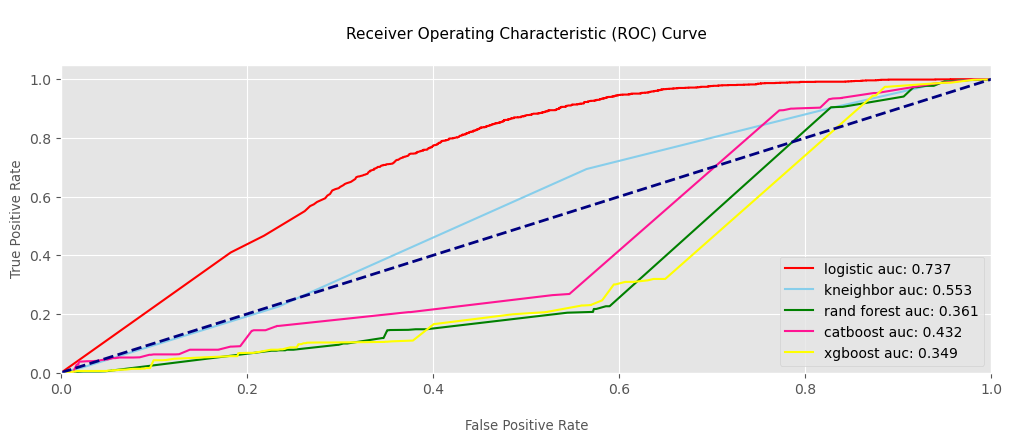

In [359]:
from sklearn.metrics import roc_curve, auc
l_proba = l.predict_proba(x_test)[:, 1]
l_fpr, l_tpr, l_thresholds = roc_curve(y_test, l_proba)
l_auc_score = auc(l_fpr, l_tpr)

k_proba = k.predict_proba(x_test)[:, 1]
k_fpr, k_tpr, k_thresholds = roc_curve(y_test, k_proba)
k_auc_score = auc(k_fpr, k_tpr)

'''
s_proba = s.predict_proba(x_test)[:, 1]
s_fpr, s_tpr, s_thresholds = roc_curve(y_test, s_proba)
s_auc_score = auc(s_fpr, s_tpr)
'''

f_proba = f.predict_proba(x_test)[:, 1]
f_fpr, f_tpr, f_thresholds = roc_curve(y_test, f_proba)
f_auc_score = auc(f_fpr, f_tpr)

c_proba = c.predict_proba(x_test)[:, 1]
c_fpr, c_tpr, c_thresholds = roc_curve(y_test, c_proba)
c_auc_score = auc(c_fpr, c_tpr)

x_proba = x.predict_proba(x_test)[:, 1]
x_fpr, x_tpr, x_thresholds = roc_curve(y_test, x_proba)
x_auc_score = auc(x_fpr, x_tpr)

plt.figure(figsize = (12, 4))
plt.plot(l_fpr, l_tpr, label = f'logistic auc: {round(l_auc_score, 3)}', color = 'red')
plt.plot(k_fpr, k_tpr, label = f'kneighbor auc: {round(k_auc_score, 3)}', color = 'skyblue')
# plt.plot(s_fpr, s_tpr, label = f'support vec auc: {round(s_auc_score, 3)}', color = 'orange')
plt.plot(f_fpr, f_tpr, label = f'rand forest auc: {round(f_auc_score, 3)}', color = 'green')
plt.plot(c_fpr, c_tpr, label = f'catboost auc: {round(c_auc_score, 3)}', color = 'deeppink')
plt.plot(x_fpr, x_tpr, label = f'xgboost auc: {round(x_auc_score, 3)}', color = 'yellow')

plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('\nFalse Positive Rate', fontsize = 9.5)
plt.title('\nReceiver Operating Characteristic (ROC) Curve\n', fontsize = 11)
plt.ylabel('True Positive Rate', fontsize = 9.5)
plt.legend(loc = 'lower right')
plt.show()